In [ ]:
import sys

## find 'core' package
sys.path.insert(0, '../..')

sys.version

In [2]:
import pandas as pd

from core.models import unit
from core.models.table import Table
from core.factories import column_factory

In [3]:
from core.generators.label_generator import LabelGenerator
from core.generators.unit_generator import UnitGenerator
from core.generators.column_generator import ColumnGenerator
from core.generators.table_generator import TableGenerator

In [4]:
vocab = [ c for c in 'abcdefghijklmnopqrstuvwxyz' ]

index_to_char = dict([ (i, c) for i, c in enumerate(vocab) ])
char_to_index = dict([ (c, i) for i, c in enumerate(vocab) ])

label_generator = LabelGenerator(index_to_char)
unit_generator = UnitGenerator(unit.get_unit_lookup())

column_generator = ColumnGenerator(label_generator, unit_generator)

In [5]:
table_1 = Table()

table_1.set_id('1')
table_1.n_spaces_between_columns = 5
table_1.max_number_of_labels = 10
table_1.columns = [ 
    column_factory.create_column(
        order = 0,
        min_label_length = 2,
        max_label_length = 12,
        max_unit_length = 6,
        max_number_of_label_parts = 4
    )
]

table_2 = Table()

table_2.set_id('2')
table_2.n_spaces_between_columns = 5
table_2.max_number_of_labels = 10
table_2.columns = [ 
    column_factory.create_column(
        order = 0,
        min_label_length = 2,
        max_label_length = 12,
        max_unit_length = 6,
        max_number_of_label_parts = 4
    ),
    column_factory.create_column(
        order = 1,
        min_label_length = 4,
        max_label_length = 15,
        max_unit_length = 6,
        max_number_of_label_parts = 3
    )
]

table_3 = Table()

table_3.set_id('3')
table_3.n_spaces_between_columns = 5
table_3.max_number_of_labels = 10
table_3.columns = [ 
    column_factory.create_column(
        order = 0,
        min_label_length = 2,
        max_label_length = 12,
        max_unit_length = 6,
        max_number_of_label_parts = 4
    ),
    column_factory.create_column(
        order = 1,
        min_label_length = 4,
        max_label_length = 15,
        max_unit_length = 6,
        max_number_of_label_parts = 3
    ),
    column_factory.create_column(
        order = 2,
        min_label_length = 2,
        max_label_length = 12,
        max_unit_length = 6,
        max_number_of_label_parts = 4
    )
]

In [6]:
table_lookup = {}

table_lookup[table_1.get_id()] = {
    'table': table_1,
    'table_generator': TableGenerator(table_1, column_generator),
}

table_lookup[table_2.get_id()] = {
    'table': table_2,
    'table_generator': TableGenerator(table_2, column_generator),
}

table_lookup[table_3.get_id()] = {
    'table': table_3,
    'table_generator': TableGenerator(table_3, column_generator),
}

In [7]:
_, x1, _ = table_lookup[table_1.get_id()]['table_generator'].get_table()
_, x2, _ = table_lookup[table_2.get_id()]['table_generator'].get_table()
_, x3, _ = table_lookup[table_3.get_id()]['table_generator'].get_table()

X = [
    x1,
    x2,
    x3
]

## max 3, only need two splits
y = [
    [-1, -1],
    [23, -1],
    [23, 49]
]

In [8]:
print('\n'.join(X[0]))

znalyg      2.25
            cm



In [9]:
print('\n'.join(X[1]))

fysfcsmanx  1.79 m     bqom hiebj     2.75
nezdrhiql br                          m/s
bvbiiezelvw 1.67       otafsx         2.35 m
            cm/s       kktfvrahzosajz
ykbujpneit  3.05       yymjm          0.89
llqs ydilc  cm                        cm
kl          3.57 m     vhypqtimjj     1.53
tvbinrgrlvi            ljfzzbmh       cm/s
bse                    eybra          1.47
                       godpucocixwu   cm/s
                       sogckrwcsaaqv  1.3 cm
                       ajyjecz
                       sail           4.32
                                      cm
                       kdpbfy         3.53 m



In [10]:
print('\n'.join(X[2]))

xwqamrvbirg 2.36       doklmui        1.77       alnuwry     0.9
            m/s        xtnidlkblwfv   cm/s       qvqlephvez  m/s
udfmhdzazb  1.62       qykunmqtwzpy   2.76       uombna      1.86
axqhto      m/s                       cm/s       wnilmenjb   m/s
vbaeyvyqa              njoxkehtue     1.97       tnjz
rrwyhs gz   0.57                      cm/s       cwpvc       1.44
qcnftzig    m/s        rbomnfmf       2.68       lhnsmgm opfocm
jgiqd viz   0.71       bgcugcwaffvkuv m/s        rh          2.23
            m/s                                              cm
oehzq       1.84                                 dbrlpaw io  4.22
mzbbdujvabu m/s                                              cm
oi                                               eijgf       0.22
wywxckxrbf  2.87                                 xvnvieis    cm/s
fctuinpa jy cm/s                                 nilfj qfifyk1.64
                                                             cm
                                 

In [11]:
import matplotlib.pyplot as plt

In [32]:
w = 0
h = 0
for key in table_lookup.keys():
    table = table_lookup[key]['table']
    
    width, height = table.get_max_size()
    
    if width > w:
        w = width
        
    if height > h:
        h = height
        
def convert_text_to_img(X, h, w):
    X_t = [ ]
    for example in X:

        img = []
        for row in example:
            u = [ 0 if r == ' ' else 1 for r in row ]
            if len(u) < w:
                u = u + [ 0 for _ in range(w - len(u))]

            img.append(u)

        while len(img) < h:
            img.append([0 for _ in range(w)])

        X_t.append(img)
    
    return X_t

X_t = convert_text_to_img(X, h, w)

In [13]:
import numpy as np

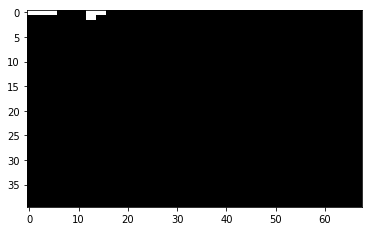

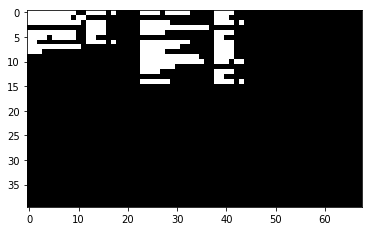

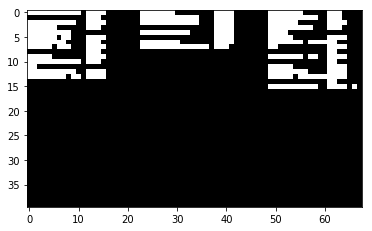

In [14]:
for example in X_t:
    plt.imshow(np.array(example), cmap='gray')
    plt.show()

In [15]:
from keras.utils import to_categorical

from keras.models import Sequential
from keras.metrics import RootMeanSquaredError
from keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten

Using TensorFlow backend.


In [16]:
X_train = np.array(X_t)

In [17]:
X_train.shape[1:]

(40, 68)

In [18]:
y_train = np.array(y)

print(y_train)

[[-1 -1]
 [23 -1]
 [23 49]]


In [19]:
model = Sequential()

model.add(Conv1D(15, kernel_size=3, input_shape = X_train.shape[1:]))
model.add(MaxPool1D(3))

model.add(Flatten())

## number of units
units = y_train.shape[1]

model.add(Dense(units, activation='linear'))

In [20]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics = [RootMeanSquaredError()]
)

In [21]:
loss = 5000

iterations = 1

while loss > 0.001:
    history = model.fit(X_train, y_train, epochs=1, verbose=0)
    loss = history.history['loss'][-1]
    
    iterations += 1
    
print(iterations, '->', loss)

1037 -> 0.0009881776059046388


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 38, 15)            3075      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 15)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 180)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 362       
Total params: 3,437
Trainable params: 3,437
Non-trainable params: 0
_________________________________________________________________


In [23]:
def split_file(indexes, text):

    splits = []

    previous_index = -1
    for index in filter(lambda x: x > 0, indexes):
        for row in text:
            if previous_index > 0:
                splits.append(row[previous_index:index].tolist())
            else:
                splits.append(row[:index].tolist())

        previous_index = index

    if previous_index > 0:
        for row in text:
            splits.append(row[previous_index:].tolist())
            
    if len(splits) == 0:
        return text
    
    _max = np.max([
        len(row)
        for row in splits
    ])

    formatted = []
    for row in splits:
        while len(row) < _max:
            row.append(0)

        formatted.append(row)
        
    return formatted

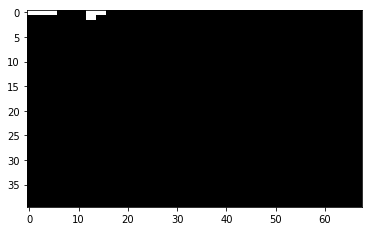

In [24]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

indexes = [
    int(round(y))
    for y
    in model.predict(np.array([X_train[0]]))[0]
]

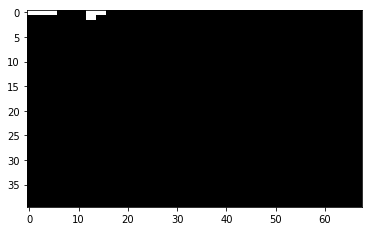

In [25]:
formatted = split_file(indexes, X_train[0])

plt.imshow(formatted, cmap='gray')
plt.show()

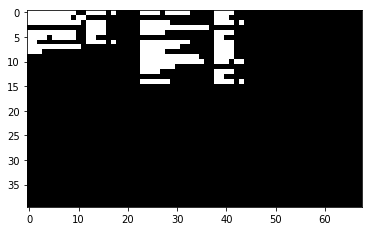

[23, -1]


In [26]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

indexes = [
    int(round(y))
    for y
    in model.predict(np.array([X_train[1]]))[0]
]

print(indexes)

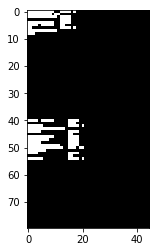

In [27]:
formatted = split_file(indexes, X_train[1])

plt.imshow(formatted, cmap='gray')
plt.show()

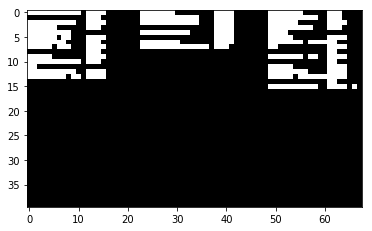

[23, 49]


In [28]:
plt.imshow(X_train[2], cmap='gray')
plt.show()

indexes = [
    int(round(y))
    for y
    in model.predict(np.array([X_train[2]]))[0]
]

print(indexes)

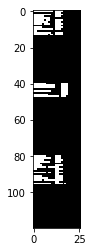

In [29]:
formatted = split_file(indexes, X_train[2])

plt.imshow(formatted, cmap='gray')
plt.show()

In [43]:
_, x4, _ = table_lookup[table_3.get_id()]['table_generator'].get_table()

X_holdout = convert_text_to_img([x4], h, w)

In [44]:
X_holdout = np.array(X_holdout)

(1, 40, 68)

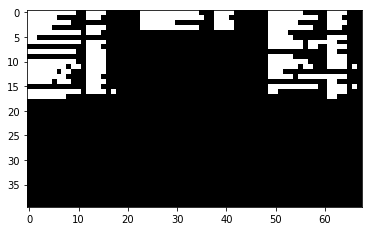

[18, 45]


In [49]:
plt.imshow(np.array(X_holdout[0]), cmap='gray')
plt.show()

indexes = [
    int(round(y))
    for y
    in model.predict(np.array(X_holdout))[0]
]

print(indexes)

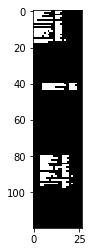

In [50]:
formatted = split_file(indexes, np.array(X_holdout[0]))

plt.imshow(formatted, cmap='gray')
plt.show()